In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
BASE_DIR = '/content/drive/MyDrive/Cropped_images_of_hammad_and_not_hammad'

In [4]:
import os
img_dirs = []
for entry in os.scandir(BASE_DIR):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['/content/drive/MyDrive/Cropped_images_of_hammad_and_not_hammad/Not_hammad',
 '/content/drive/MyDrive/Cropped_images_of_hammad_and_not_hammad/hammad']

In [5]:
image_paths=[]
celebrity_lables=[]
for img_dir in img_dirs:
    for filename in tqdm(os.listdir(img_dir)):
        image_path = os.path.join(img_dir, filename)
        celebrity_name=img_dir.split('/')[-1]
        image_paths.append(image_path)
        celebrity_lables.append(celebrity_name)

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [6]:
celebrity_lables

['Not_hammad',
 'Not_hammad',
 'Not_hammad',
 'Not_hammad',
 'Not_hammad',
 'Not_hammad',
 'Not_hammad',
 'Not_hammad',
 'Not_hammad',
 'Not_hammad',
 'Not_hammad',
 'Not_hammad',
 'Not_hammad',
 'Not_hammad',
 'Not_hammad',
 'hammad',
 'hammad',
 'hammad',
 'hammad',
 'hammad',
 'hammad',
 'hammad',
 'hammad',
 'hammad',
 'hammad']

In [7]:
# convert to dataframe
df = pd.DataFrame()
df['image_path'], df['celebrity_label']= image_paths,celebrity_lables
df.tail()

,image_path,celebrity_label
20,/content/drive/MyDrive/Cropped_images_of_hamma...,hammad
21,/content/drive/MyDrive/Cropped_images_of_hamma...,hammad
22,/content/drive/MyDrive/Cropped_images_of_hamma...,hammad
23,/content/drive/MyDrive/Cropped_images_of_hamma...,hammad
24,/content/drive/MyDrive/Cropped_images_of_hamma...,hammad


In [8]:
df['celebrity_label'].unique()

array(['Not_hammad', 'hammad'], dtype=object)

In [9]:
# map labels for celebrity
celebrity_dict = {0:'Not_hammad', 1:'hammad'}

In [10]:
df['celebrity_label']=df['celebrity_label'].replace(['Not_hammad','hammad'],[0,1])

In [11]:
df['celebrity_label'].value_counts()

0    15
1    10
Name: celebrity_label, dtype: int64

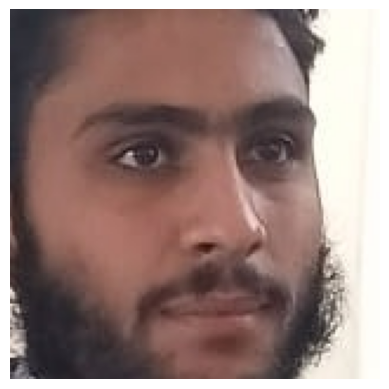

In [12]:
from PIL import Image
img = Image.open(df['image_path'][0])
plt.axis('off')
plt.imshow(img)

In [ ]:
# sns.countplot(df['celebrity_label'])

In [13]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [14]:
X = extract_features(df['image_path'])

  0%|          | 0/25 [00:00<?, ?it/s]

In [15]:
X.shape

(25, 128, 128, 1)

In [16]:
X = X/255.0

In [17]:
celebrity = np.array(df['celebrity_label'])

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

In [19]:
model.compile(loss=['sparse_categorical_crossentropy'], optimizer='adam', metrics=['accuracy'])

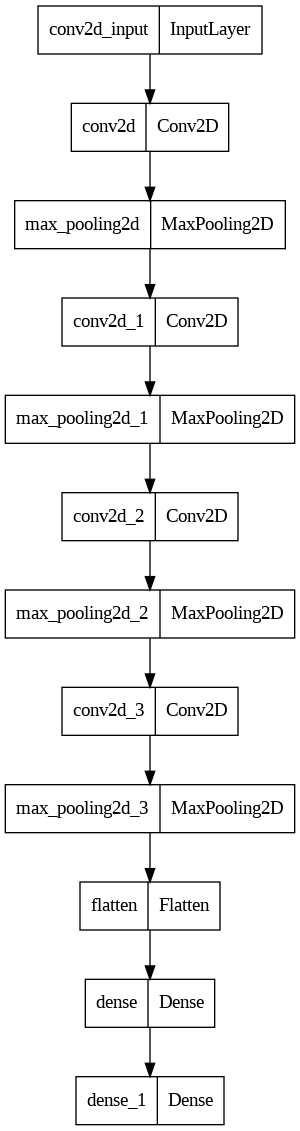

In [20]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [21]:
# train model
EPOCHS = 100
history = model.fit(x=X, y=celebrity, batch_size=32, epochs=EPOCHS, validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 14s 14s/step - loss: 0.6851 - accuracy: 0.7500 - val_loss: 1.9238 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 46ms/step - loss: 0.5495 - accuracy: 0.7500 - val_loss: 1.3046 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 45ms/step - loss: 0.5320 - accuracy: 0.7500 - val_loss: 1.4884 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 60ms/step - loss: 0.5175 - accuracy: 0.7500 - val_loss: 1.7863 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 46ms/step - loss: 0.5135 - accuracy: 0.7500 - val_loss: 1.3832 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 46ms/step - loss: 0.4927 - accuracy: 0.7500 - val_loss: 1.2969 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 47ms/step - loss: 0.4762 - accuracy: 0.7500 - val_loss: 1.5880 - val_accuracy: 0.0

In [22]:
model.save("celeberty_detection_model.h5")
print("Saved model to disk")

Saved model to disk


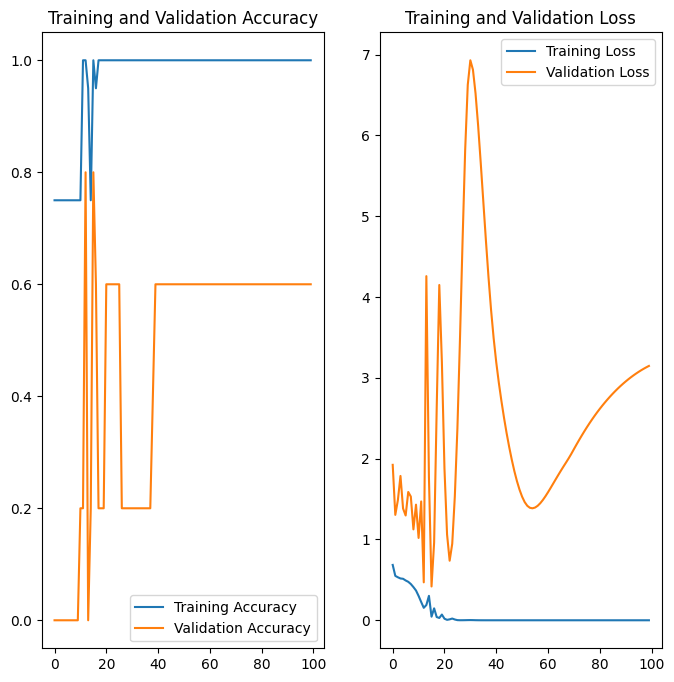

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

Original name: hammad
1/1 [==============================] - 0s 24ms/step
Predicted celebrity: hammad


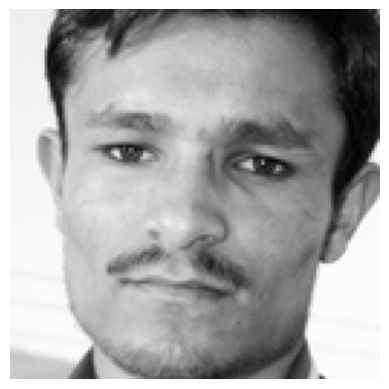

In [51]:
image_index = 24
print("Original name:", celebrity_dict[celebrity[image_index]])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred = np.argmax(pred.round(2))
prediction=celebrity_dict[pred]
print("Predicted celebrity:",prediction)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original name: hammad
1/1 [==============================] - 0s 75ms/step
Predicted celebrity: Not_hammad


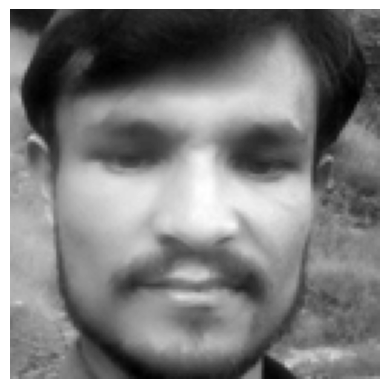

In [53]:
image_index = 22
print("Original name:", celebrity_dict[celebrity[image_index]])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred = np.argmax(pred.round(2))
prediction=celebrity_dict[pred]
print("Predicted celebrity:",prediction)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');